# Working with Vectors
* Notebook by Adam Lang
* Date: 2/19/2025

# Overview
* Part of the "Vector Databases Professional Certificate" by Weaviate

# Draw out Vectors

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Question 1:
* Given 3D Vectors [40,120,60] and [60,50,90] draw them out.

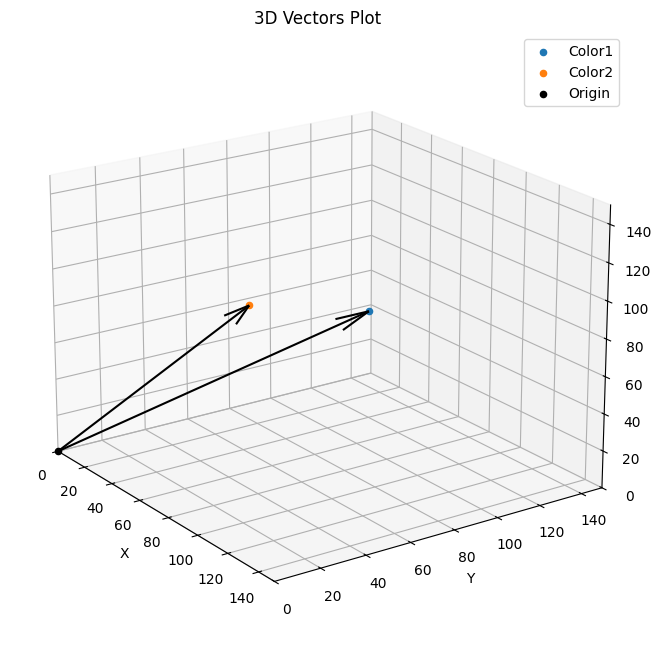

In [8]:
## 1. init 2 vectors
color1 = [40, 120, 60]
color2 = [60, 50, 90]

ax = plt.figure(figsize=(12,8)).add_subplot(projection='3d')


## 2. Draw out vectors
ax.scatter(xs=color1[0], ys=color1[1], zs=color1[2], zdir='z', label='Color1')
ax.scatter(xs=color2[0], ys=color2[1], zs=color2[2], zdir='z', label='Color2')

## origin [0,0,0]
ax.scatter(0,0,0, zdir='z', label="Origin", c="black")

ax.quiver(0,0,0, color1[0], color1[1], color1[2], color="black", arrow_length_ratio=0.1)
ax.quiver(0,0,0, color2[0], color2[1], color2[2], color="black", arrow_length_ratio=0.1)



## setlegend
ax.legend()

## set axes limits
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(0, 150)

## set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# customize view angle so it's easier to see the scatter plots on plane y=0
ax.view_init(elev=20, azim=-35, roll=0)

## title
plt.title('3D Vectors Plot')
## show plot
plt.show();


Question 2:
* Calculate the euclidean, manhattan, cosine, and dot product distances between these vectors.

# Manhattan Distance
* Manhattan distance measures the **sum of the absolute differences between the coordinates of the points.**
  * This method is called "Manhattan distance" because, like a taxi driving through the grid-like streets of Manhattan, it must travel along the grid lines.

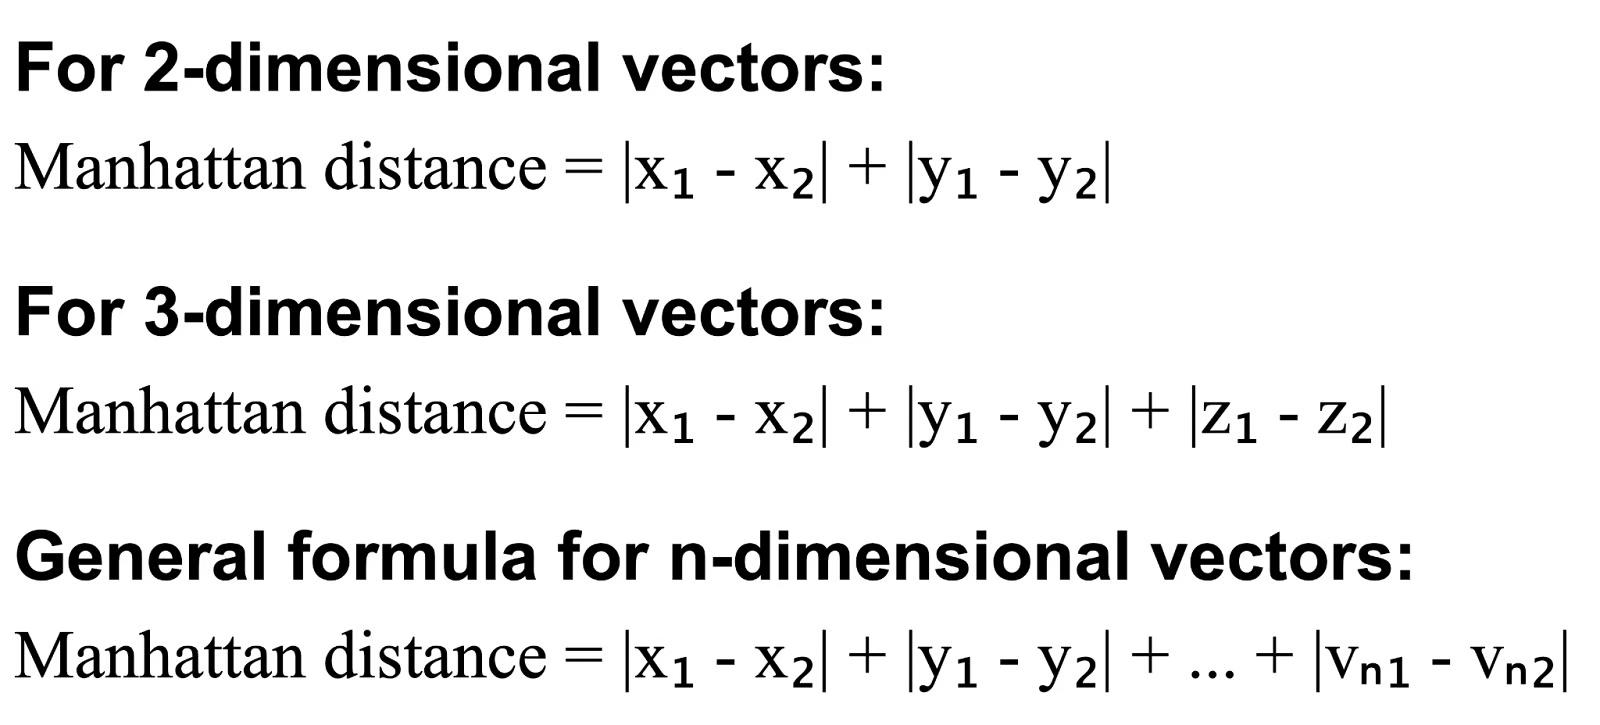



In [9]:
L1 = [color1[i] - color2[i] for i in range(len(color1))]

L1 = np.abs(L1).sum()

print(L1)

120


In [10]:
## alternate L1 or manhattan calculation
a = np.array(color1)
b = np.array(color2)

## calculate MH distance
np.linalg.norm((a-b), ord=1)

120.0

# Euclidean Distance
* While Manhattan distance measures the path along grid lines, Euclidean distance measures the straight-line distance between two points or, "as the crow flies," as they say.
* This is literally the orange dot to the blue dot distance as seen above.

* The Euclidean distance formula is given by:

`d =√[(x2 – x1)2 + (y2 – y1)2]`

Where,

“d” is the Euclidean distance

(x1, y1) is the coordinate of the first point

(x2, y2) is the coordinate of the second point.

In [13]:
L2 = [(color1[i] - color2[i])**2 for i in range(len(color1))]

## sqrt
L2 = np.sqrt(np.array(L2).sum())

print(L2)

78.74007874011811


In [14]:
## Alternative method of Euc dist
np.linalg.norm((a-b), ord=2)

78.74007874011811

Summary
* We can see the "straight line" or Euc distance is much shorter than the Manhattan distance.

# Cosine Distance
* Cosine distance measures the dissimilarity between two vectors by calculating the cosine of the angle between them.
* It can be defined as one minus cosine similarity, as we see in the formula below:

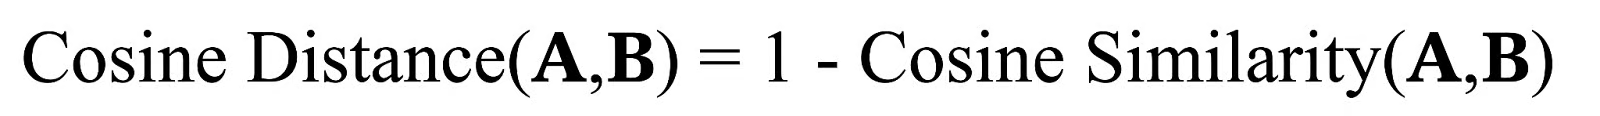

In a more detailed way, with a more formal mathematical expression, cosine distance is calculated using the formula below.

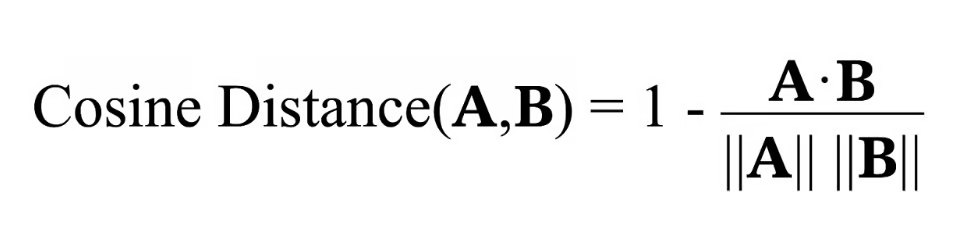

* Above, `A⋅B` represents the dot product of the vectors A and B, and `||A|| ||B||` are the magnitudes, or Euclidean norms, of the vectors.

* Using this formula we can quantify the cosine distance with a range from 0 to 2.
  * A cosine distance of 0 means the vectors are perfectly aligned (no angle between them), indicating maximum similarity
  * A value closer to 2 suggests they are diametrically opposite, indicating maximum dissimilarity.

## Cosine similarity vs. cosine distance
* While cosine distance measures the **dissimilarity between vectors** by calculating the cosine of the angle between them.
* **cosine similarity quantifies how similar two vectors are based on the cosine of the same angle.**

* The **Cosine similarity ranges from -1 to 1.**
  * A cosine similarity of 1 means the vectors are perfectly aligned (no angle between them), indicating maximum similarity, whereas a value of -1 implies they are diametrically opposite, reflecting maximum dissimilarity.
  * Values near zero indicate orthogonality.

In [15]:
## this is direction, not magnitude or length as the 2 above!!
cosine = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

print(cosine)

0.8271930531781648


Summary
* This means the vectors are in the same direction and thus we assume they are highly similar.

# Dot Product
* Dot product measures magnitude and direction not just direction as cosine does.
* Often times we use the dot product when our data has not been "normalized". If your data is normalized then you would more than likely use cosine.

In [16]:
dot = np.array([color1[i]*color2[i] for i in range(len(color1))]).sum()

print(dot)

13800


In [17]:
## alternate method
np.dot(a,b)

13800

Question 3:

Can you come up with a color that has a smaller cosine distance from the first vector?

In [18]:
color1 = [40, 120, 60]
color2 = [60, 50, 90]

color3 = [color1[0] + 10, color1[1] + 15, color1[2] + 5]

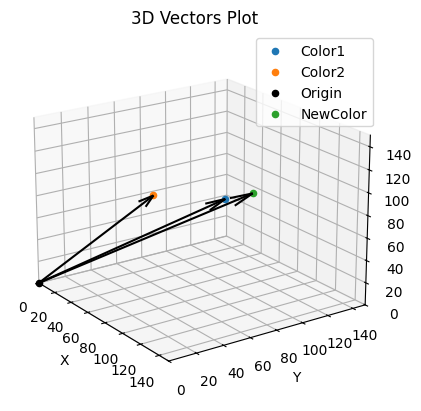

In [19]:
## visualize this
ax = plt.figure().add_subplot(projection='3d')

# plot a sin curve using x and y axes
ax.scatter(xs=color1[0], ys=color1[1], zs=color1[2], zdir='z', label='Color1')
ax.scatter(xs=color2[0], ys=color2[1], zs=color2[2], zdir='z', label='Color2')

ax.scatter(0, 0, 0, zdir='z', label='Origin', c='black')

ax.quiver(0,0,0, color1[0], color1[1], color1[2], color="black", arrow_length_ratio=0.1)
ax.quiver(0,0,0, color2[0], color2[1], color2[2], color="black", arrow_length_ratio=0.1)

## add vector 3
ax.scatter(xs=color3[0], ys=color3[1], zs=color3[2], zdir='z', label='NewColor')
ax.quiver(0,0,0, color3[0], color3[1], color3[2], color="black", arrow_length_ratio=0.1)


## setlegend
ax.legend()

## set axes limits
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(0, 150)

## set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# customize view angle so it's easier to see the scatter plots on plane y=0
ax.view_init(elev=20, azim=-35, roll=0)

## title
plt.title('3D Vectors Plot')
## show plot
plt.show();
